In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import torch.utils.data as td
import random, time
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def cifar_loaders(batch_size, shuffle_test=False):
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.225, 0.225, 0.225])
    train = datasets.CIFAR10('./', train=True, download=True,
        transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomCrop(32, 4),
            transforms.ToTensor(),
            normalize,
        ]))
    test = datasets.CIFAR10('./', train=False,
        transform=transforms.Compose([transforms.ToTensor(), normalize]))
    train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size,
        shuffle=True, pin_memory=True)
    test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size,
        shuffle=shuffle_test, pin_memory=True)
    return train_loader, test_loader

In [3]:
batch_size = 32
test_batch_size = 32
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_loader, _ = cifar_loaders(batch_size)
_, test_loader = cifar_loaders(test_batch_size)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.h1 = nn.Linear(3 * 32 * 32, 256) 
        self.h2 = nn.Linear(256, 128)  
        self.output = nn.Linear(128, 10)  
        self.dropout = nn.Dropout(0.3) 

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = F.relu(self.h1(x))
        x = F.relu(self.h2(x))
        x = self.dropout(self.output(x))

        return x

In [5]:
learning_rate = 0.0001
num_epochs = 100

net = Net()
net.to(device)

Net(
  (h1): Linear(in_features=3072, out_features=256, bias=True)
  (h2): Linear(in_features=256, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=5, factor=0.1, verbose=True, cooldown=10)

In [7]:
max_accuracy = 0
acc_values = []
for epoch in tqdm(range(num_epochs)):
    correct = 0
    start_time = time.time()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        predictions = torch.max(outputs,1)[1]
        correct+=(predictions==labels).sum().cpu().numpy()
        acc = 100*correct/len(train_loader.dataset)
        acc_values.append(acc)

        running_loss += loss.item()

    print('Epoch[% d/% d]: Loss: %.4f' % (epoch + 1, num_epochs, running_loss / (i + 1)))
    print('Epoch[%d] accuracy %f' % (epoch+1, acc))

  1%|          | 1/100 [00:28<47:17, 28.66s/it]

Epoch[ 1/ 100]: Loss: 1.9652
Epoch[1] accuracy 29.628000


  2%|▏         | 2/100 [00:56<46:27, 28.45s/it]

Epoch[ 2/ 100]: Loss: 1.8498
Epoch[2] accuracy 34.176000


  3%|▎         | 3/100 [01:23<44:54, 27.78s/it]

Epoch[ 3/ 100]: Loss: 1.8044
Epoch[3] accuracy 35.802000


  4%|▍         | 4/100 [01:50<43:50, 27.40s/it]

Epoch[ 4/ 100]: Loss: 1.7754
Epoch[4] accuracy 36.772000


  5%|▌         | 5/100 [02:17<43:16, 27.33s/it]

Epoch[ 5/ 100]: Loss: 1.7528
Epoch[5] accuracy 37.608000


  6%|▌         | 6/100 [02:45<42:51, 27.35s/it]

Epoch[ 6/ 100]: Loss: 1.7333
Epoch[6] accuracy 37.910000


  7%|▋         | 7/100 [03:12<42:08, 27.19s/it]

Epoch[ 7/ 100]: Loss: 1.7147
Epoch[7] accuracy 38.974000


  8%|▊         | 8/100 [03:39<41:30, 27.07s/it]

Epoch[ 8/ 100]: Loss: 1.7011
Epoch[8] accuracy 39.346000


  9%|▉         | 9/100 [04:06<41:10, 27.14s/it]

Epoch[ 9/ 100]: Loss: 1.6876
Epoch[9] accuracy 39.908000


 10%|█         | 10/100 [04:33<40:36, 27.07s/it]

Epoch[ 10/ 100]: Loss: 1.6712
Epoch[10] accuracy 40.428000


 11%|█         | 11/100 [05:00<40:06, 27.04s/it]

Epoch[ 11/ 100]: Loss: 1.6624
Epoch[11] accuracy 40.368000


 12%|█▏        | 12/100 [05:27<39:44, 27.10s/it]

Epoch[ 12/ 100]: Loss: 1.6540
Epoch[12] accuracy 41.004000


 13%|█▎        | 13/100 [05:54<39:10, 27.02s/it]

Epoch[ 13/ 100]: Loss: 1.6493
Epoch[13] accuracy 41.096000


 14%|█▍        | 14/100 [06:20<38:29, 26.85s/it]

Epoch[ 14/ 100]: Loss: 1.6364
Epoch[14] accuracy 41.434000


 15%|█▌        | 15/100 [06:47<38:03, 26.86s/it]

Epoch[ 15/ 100]: Loss: 1.6341
Epoch[15] accuracy 41.578000


 16%|█▌        | 16/100 [07:14<37:34, 26.84s/it]

Epoch[ 16/ 100]: Loss: 1.6285
Epoch[16] accuracy 41.644000


 17%|█▋        | 17/100 [07:41<37:05, 26.81s/it]

Epoch[ 17/ 100]: Loss: 1.6203
Epoch[17] accuracy 41.862000


 18%|█▊        | 18/100 [08:07<36:38, 26.81s/it]

Epoch[ 18/ 100]: Loss: 1.6134
Epoch[18] accuracy 42.124000


 19%|█▉        | 19/100 [08:34<36:12, 26.82s/it]

Epoch[ 19/ 100]: Loss: 1.6080
Epoch[19] accuracy 42.410000


 20%|██        | 20/100 [09:01<35:42, 26.78s/it]

Epoch[ 20/ 100]: Loss: 1.5988
Epoch[20] accuracy 42.794000


 21%|██        | 21/100 [09:28<35:12, 26.75s/it]

Epoch[ 21/ 100]: Loss: 1.5937
Epoch[21] accuracy 42.898000


 22%|██▏       | 22/100 [09:54<34:41, 26.68s/it]

Epoch[ 22/ 100]: Loss: 1.5900
Epoch[22] accuracy 42.850000


 23%|██▎       | 23/100 [10:21<34:14, 26.68s/it]

Epoch[ 23/ 100]: Loss: 1.5818
Epoch[23] accuracy 43.292000


 24%|██▍       | 24/100 [10:48<33:48, 26.70s/it]

Epoch[ 24/ 100]: Loss: 1.5739
Epoch[24] accuracy 43.550000


 25%|██▌       | 25/100 [11:14<33:23, 26.72s/it]

Epoch[ 25/ 100]: Loss: 1.5747
Epoch[25] accuracy 43.450000


 26%|██▌       | 26/100 [11:41<32:51, 26.64s/it]

Epoch[ 26/ 100]: Loss: 1.5760
Epoch[26] accuracy 43.264000


 27%|██▋       | 27/100 [12:08<32:25, 26.66s/it]

Epoch[ 27/ 100]: Loss: 1.5720
Epoch[27] accuracy 43.572000


 28%|██▊       | 28/100 [12:34<31:57, 26.63s/it]

Epoch[ 28/ 100]: Loss: 1.5598
Epoch[28] accuracy 44.050000


 29%|██▉       | 29/100 [13:01<31:27, 26.59s/it]

Epoch[ 29/ 100]: Loss: 1.5547
Epoch[29] accuracy 44.270000


 30%|███       | 30/100 [13:27<30:56, 26.52s/it]

Epoch[ 30/ 100]: Loss: 1.5544
Epoch[30] accuracy 44.026000


 31%|███       | 31/100 [13:54<30:31, 26.55s/it]

Epoch[ 31/ 100]: Loss: 1.5559
Epoch[31] accuracy 43.878000


 32%|███▏      | 32/100 [14:20<30:07, 26.59s/it]

Epoch[ 32/ 100]: Loss: 1.5468
Epoch[32] accuracy 44.234000


 33%|███▎      | 33/100 [14:47<29:43, 26.62s/it]

Epoch[ 33/ 100]: Loss: 1.5519
Epoch[33] accuracy 44.020000


 34%|███▍      | 34/100 [15:13<29:14, 26.59s/it]

Epoch[ 34/ 100]: Loss: 1.5428
Epoch[34] accuracy 44.478000


 35%|███▌      | 35/100 [15:40<28:47, 26.57s/it]

Epoch[ 35/ 100]: Loss: 1.5365
Epoch[35] accuracy 44.972000


 36%|███▌      | 36/100 [16:07<28:22, 26.59s/it]

Epoch[ 36/ 100]: Loss: 1.5396
Epoch[36] accuracy 44.740000


 37%|███▋      | 37/100 [16:33<27:52, 26.55s/it]

Epoch[ 37/ 100]: Loss: 1.5358
Epoch[37] accuracy 44.788000


 38%|███▊      | 38/100 [17:00<27:24, 26.53s/it]

Epoch[ 38/ 100]: Loss: 1.5325
Epoch[38] accuracy 44.936000


 39%|███▉      | 39/100 [17:26<26:57, 26.51s/it]

Epoch[ 39/ 100]: Loss: 1.5266
Epoch[39] accuracy 45.094000


 40%|████      | 40/100 [17:53<26:30, 26.51s/it]

Epoch[ 40/ 100]: Loss: 1.5254
Epoch[40] accuracy 44.912000


 41%|████      | 41/100 [18:19<26:03, 26.50s/it]

Epoch[ 41/ 100]: Loss: 1.5231
Epoch[41] accuracy 45.062000


 42%|████▏     | 42/100 [18:45<25:35, 26.47s/it]

Epoch[ 42/ 100]: Loss: 1.5188
Epoch[42] accuracy 45.286000


 43%|████▎     | 43/100 [19:12<25:11, 26.53s/it]

Epoch[ 43/ 100]: Loss: 1.5192
Epoch[43] accuracy 45.478000


 44%|████▍     | 44/100 [19:38<24:40, 26.43s/it]

Epoch[ 44/ 100]: Loss: 1.5139
Epoch[44] accuracy 45.596000


 45%|████▌     | 45/100 [20:05<24:17, 26.50s/it]

Epoch[ 45/ 100]: Loss: 1.5155
Epoch[45] accuracy 45.314000


 46%|████▌     | 46/100 [20:31<23:44, 26.38s/it]

Epoch[ 46/ 100]: Loss: 1.5096
Epoch[46] accuracy 45.350000


 47%|████▋     | 47/100 [20:57<23:16, 26.35s/it]

Epoch[ 47/ 100]: Loss: 1.5082
Epoch[47] accuracy 45.828000


 48%|████▊     | 48/100 [21:24<22:51, 26.38s/it]

Epoch[ 48/ 100]: Loss: 1.5022
Epoch[48] accuracy 46.080000


 49%|████▉     | 49/100 [21:50<22:22, 26.33s/it]

Epoch[ 49/ 100]: Loss: 1.4960
Epoch[49] accuracy 46.182000


 50%|█████     | 50/100 [22:16<21:57, 26.35s/it]

Epoch[ 50/ 100]: Loss: 1.4931
Epoch[50] accuracy 46.510000


 51%|█████     | 51/100 [22:43<21:36, 26.45s/it]

Epoch[ 51/ 100]: Loss: 1.4985
Epoch[51] accuracy 45.906000


 52%|█████▏    | 52/100 [23:10<21:10, 26.46s/it]

Epoch[ 52/ 100]: Loss: 1.4959
Epoch[52] accuracy 46.130000


 53%|█████▎    | 53/100 [23:36<20:40, 26.39s/it]

Epoch[ 53/ 100]: Loss: 1.4947
Epoch[53] accuracy 45.966000


 54%|█████▍    | 54/100 [24:02<20:13, 26.38s/it]

Epoch[ 54/ 100]: Loss: 1.4906
Epoch[54] accuracy 46.276000


 55%|█████▌    | 55/100 [24:28<19:46, 26.36s/it]

Epoch[ 55/ 100]: Loss: 1.4926
Epoch[55] accuracy 46.204000


 56%|█████▌    | 56/100 [24:55<19:22, 26.42s/it]

Epoch[ 56/ 100]: Loss: 1.4868
Epoch[56] accuracy 46.826000


 57%|█████▋    | 57/100 [25:21<18:53, 26.37s/it]

Epoch[ 57/ 100]: Loss: 1.4861
Epoch[57] accuracy 46.634000


 58%|█████▊    | 58/100 [25:48<18:27, 26.37s/it]

Epoch[ 58/ 100]: Loss: 1.4843
Epoch[58] accuracy 46.388000


 59%|█████▉    | 59/100 [26:14<17:56, 26.27s/it]

Epoch[ 59/ 100]: Loss: 1.4795
Epoch[59] accuracy 46.676000


 60%|██████    | 60/100 [26:40<17:32, 26.31s/it]

Epoch[ 60/ 100]: Loss: 1.4785
Epoch[60] accuracy 46.904000


 61%|██████    | 61/100 [27:06<17:03, 26.25s/it]

Epoch[ 61/ 100]: Loss: 1.4776
Epoch[61] accuracy 46.500000


 62%|██████▏   | 62/100 [27:33<16:39, 26.29s/it]

Epoch[ 62/ 100]: Loss: 1.4775
Epoch[62] accuracy 46.686000


 63%|██████▎   | 63/100 [27:59<16:11, 26.26s/it]

Epoch[ 63/ 100]: Loss: 1.4801
Epoch[63] accuracy 46.450000


 64%|██████▍   | 64/100 [28:25<15:41, 26.16s/it]

Epoch[ 64/ 100]: Loss: 1.4723
Epoch[64] accuracy 46.820000


 65%|██████▌   | 65/100 [28:51<15:17, 26.20s/it]

Epoch[ 65/ 100]: Loss: 1.4750
Epoch[65] accuracy 46.786000


 66%|██████▌   | 66/100 [29:17<14:51, 26.23s/it]

Epoch[ 66/ 100]: Loss: 1.4755
Epoch[66] accuracy 46.616000


 67%|██████▋   | 67/100 [29:44<14:26, 26.27s/it]

Epoch[ 67/ 100]: Loss: 1.4685
Epoch[67] accuracy 46.978000


 68%|██████▊   | 68/100 [30:10<14:00, 26.25s/it]

Epoch[ 68/ 100]: Loss: 1.4719
Epoch[68] accuracy 46.830000


 69%|██████▉   | 69/100 [30:37<13:38, 26.39s/it]

Epoch[ 69/ 100]: Loss: 1.4632
Epoch[69] accuracy 47.252000


 70%|███████   | 70/100 [31:03<13:10, 26.37s/it]

Epoch[ 70/ 100]: Loss: 1.4544
Epoch[70] accuracy 47.310000


 71%|███████   | 71/100 [31:29<12:46, 26.43s/it]

Epoch[ 71/ 100]: Loss: 1.4637
Epoch[71] accuracy 47.034000


 72%|███████▏  | 72/100 [31:56<12:21, 26.49s/it]

Epoch[ 72/ 100]: Loss: 1.4603
Epoch[72] accuracy 47.250000


 73%|███████▎  | 73/100 [32:22<11:54, 26.45s/it]

Epoch[ 73/ 100]: Loss: 1.4589
Epoch[73] accuracy 47.356000


 74%|███████▍  | 74/100 [32:49<11:26, 26.39s/it]

Epoch[ 74/ 100]: Loss: 1.4609
Epoch[74] accuracy 47.112000


 75%|███████▌  | 75/100 [33:15<11:00, 26.43s/it]

Epoch[ 75/ 100]: Loss: 1.4566
Epoch[75] accuracy 47.338000


 76%|███████▌  | 76/100 [33:42<10:35, 26.48s/it]

Epoch[ 76/ 100]: Loss: 1.4557
Epoch[76] accuracy 47.298000


 77%|███████▋  | 77/100 [34:08<10:08, 26.45s/it]

Epoch[ 77/ 100]: Loss: 1.4540
Epoch[77] accuracy 47.442000


 78%|███████▊  | 78/100 [34:35<09:41, 26.43s/it]

Epoch[ 78/ 100]: Loss: 1.4514
Epoch[78] accuracy 47.618000


 79%|███████▉  | 79/100 [35:01<09:13, 26.36s/it]

Epoch[ 79/ 100]: Loss: 1.4586
Epoch[79] accuracy 47.268000


 80%|████████  | 80/100 [35:27<08:47, 26.38s/it]

Epoch[ 80/ 100]: Loss: 1.4457
Epoch[80] accuracy 47.830000


 81%|████████  | 81/100 [35:54<08:21, 26.42s/it]

Epoch[ 81/ 100]: Loss: 1.4455
Epoch[81] accuracy 47.596000


 82%|████████▏ | 82/100 [36:20<07:55, 26.39s/it]

Epoch[ 82/ 100]: Loss: 1.4447
Epoch[82] accuracy 47.798000


 83%|████████▎ | 83/100 [36:46<07:29, 26.41s/it]

Epoch[ 83/ 100]: Loss: 1.4423
Epoch[83] accuracy 47.828000


 84%|████████▍ | 84/100 [37:13<07:02, 26.40s/it]

Epoch[ 84/ 100]: Loss: 1.4414
Epoch[84] accuracy 47.998000


 85%|████████▌ | 85/100 [37:39<06:37, 26.48s/it]

Epoch[ 85/ 100]: Loss: 1.4483
Epoch[85] accuracy 47.980000


 86%|████████▌ | 86/100 [38:06<06:09, 26.43s/it]

Epoch[ 86/ 100]: Loss: 1.4421
Epoch[86] accuracy 47.792000


 87%|████████▋ | 87/100 [38:33<05:44, 26.51s/it]

Epoch[ 87/ 100]: Loss: 1.4403
Epoch[87] accuracy 47.788000


 88%|████████▊ | 88/100 [38:59<05:18, 26.57s/it]

Epoch[ 88/ 100]: Loss: 1.4382
Epoch[88] accuracy 47.996000


 89%|████████▉ | 89/100 [39:26<04:52, 26.57s/it]

Epoch[ 89/ 100]: Loss: 1.4372
Epoch[89] accuracy 48.054000


 90%|█████████ | 90/100 [39:52<04:24, 26.47s/it]

Epoch[ 90/ 100]: Loss: 1.4373
Epoch[90] accuracy 48.210000


 91%|█████████ | 91/100 [40:19<03:58, 26.51s/it]

Epoch[ 91/ 100]: Loss: 1.4423
Epoch[91] accuracy 47.610000


 92%|█████████▏| 92/100 [40:45<03:32, 26.51s/it]

Epoch[ 92/ 100]: Loss: 1.4393
Epoch[92] accuracy 47.990000


 93%|█████████▎| 93/100 [41:11<03:05, 26.46s/it]

Epoch[ 93/ 100]: Loss: 1.4339
Epoch[93] accuracy 48.366000


 94%|█████████▍| 94/100 [41:38<02:38, 26.41s/it]

Epoch[ 94/ 100]: Loss: 1.4279
Epoch[94] accuracy 48.158000


 95%|█████████▌| 95/100 [42:04<02:12, 26.45s/it]

Epoch[ 95/ 100]: Loss: 1.4350
Epoch[95] accuracy 48.234000


 96%|█████████▌| 96/100 [42:31<01:45, 26.44s/it]

Epoch[ 96/ 100]: Loss: 1.4316
Epoch[96] accuracy 48.252000


 97%|█████████▋| 97/100 [42:57<01:19, 26.46s/it]

Epoch[ 97/ 100]: Loss: 1.4300
Epoch[97] accuracy 48.130000


 98%|█████████▊| 98/100 [43:24<00:52, 26.50s/it]

Epoch[ 98/ 100]: Loss: 1.4299
Epoch[98] accuracy 48.586000


 99%|█████████▉| 99/100 [43:50<00:26, 26.48s/it]

Epoch[ 99/ 100]: Loss: 1.4288
Epoch[99] accuracy 48.498000


100%|██████████| 100/100 [44:17<00:00, 26.57s/it]

Epoch[ 100/ 100]: Loss: 1.4271
Epoch[100] accuracy 48.320000


In [9]:
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    correct = 0
    total = 0

    true_labels = []
    pred_labels = []
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            correct_matrix = (predicted == labels)

            true_labels += list(labels.view(-1).detach().cpu().numpy())
            pred_labels += list(predicted.view(-1).detach().cpu().numpy())

            c = correct_matrix.squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
            total += labels.size(0)
            correct += correct_matrix.sum().item()
        max_accuracy = max(max_accuracy, int(100 * correct / total))
        scheduler.step(max_accuracy)

    for i in range(10):
        print('Accuracy of %5s [%d/%d]: %2f %%' % (classes[i], class_correct[i], class_total[i],
                                                   100 * class_correct[i] / class_total[i]))

    print('Accuracy of the network [%d/%d]: %f %%' % (correct, total, 100 * correct / total))

Accuracy of plane [639/1000]: 63.900000 %
Accuracy of   car [581/1000]: 58.100000 %
Accuracy of  bird [280/1000]: 28.000000 %
Accuracy of   cat [282/1000]: 28.200000 %
Accuracy of  deer [310/1000]: 31.000000 %
Accuracy of   dog [417/1000]: 41.700000 %
Accuracy of  frog [432/1000]: 43.200000 %
Accuracy of horse [494/1000]: 49.400000 %
Accuracy of  ship [479/1000]: 47.900000 %
Accuracy of truck [537/1000]: 53.700000 %
Accuracy of the network [4451/10000]: 44.510000 %


### **1. A Heatmap showing the confusion matrix**

### **1.B**

1. Plane is most likely confused as a ship
2. Car is most likely confused as a truck
3. Bird is most likely confused as a plane
4. Cat is most likely confused as a dog
5. Deer is most likely confused as a bird
6. Dog is most likely confused as a cat
7. Frog is most likely confused as a cat
8. Horse is most likely confused as a dog
9. Ship is most likely confused as a plane
10. Truck is most likely confused as a car

### **1. C**

Dog and cat are most confused overall 

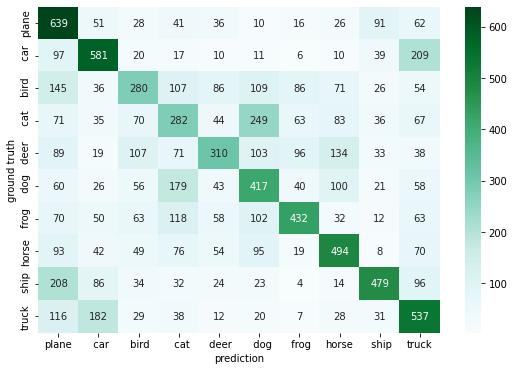

In [10]:
arr = confusion_matrix(true_labels, pred_labels)
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("ground truth")
plt.show()